# Capstone ML Models

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
#Importing Libraries and Autheticating
import pandas as pd
import numpy as np
import pandas_gbq
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
Demographics= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Demographics`',project_id='surveyproject-378222', dialect='standard') 
Accommodation = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Accommodation`',project_id='surveyproject-378222', dialect='standard')
Accommodation_feedback=pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Accommodation_feedback`',project_id='surveyproject-378222', dialect='standard')
Academic = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Academic`',project_id='surveyproject-378222', dialect='standard')
Academic_feedback=pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Academic_feedback`',project_id='surveyproject-378222', dialect='standard')
Services = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Services`',project_id='surveyproject-378222', dialect='standard')
Feedback= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Feedback`',project_id='surveyproject-378222', dialect='standard') 
Base_Survey_Table= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Base_Survey_Table`',project_id='surveyproject-378222', dialect='standard') 

Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|


In [ ]:
acf = Accommodation_feedback.copy()
label_map = {'\xa0Dissatisfied': 2, 'Neutral': 3, 'Highly Dissatisfied': 1, 'Satisfied': 4, 'Highly Satisfied': 5}
cols_to_map = ['Accm_finding_score', 'Accm_Quality_Score', 'Accm_affordibility_score','Commute_score','Needs_Availibility_Score']
acf[cols_to_map] = acf[cols_to_map].applymap(label_map.get)
weights = {'A': 0.20, 'B': 0.20, 'C': 0.20, 'D': 0.20, 'E': 0.20}
acf['Acc_score'] = ((acf['Accm_finding_score']*weights['A']) + (acf['Accm_Quality_Score']*weights['B']) + (acf['Accm_affordibility_score']*weights['C'])+ (acf['Commute_score']*weights['D']) + (acf['Needs_Availibility_Score']*weights['E']))
acf['Scaled_Acc_score']=acf['Acc_score']/5
acc_Score =acf[['ID','Acc_score']]
s_acc_Score =acf[['ID','Scaled_Acc_score']]
acf.head()

,ID,Accm_finding_score,Accm_Quality_Score,Accm_affordibility_score,Commute_score,Needs_Availibility_Score,Acc_score,Scaled_Acc_score
0,35,2,3,3,3,3,2.8,0.56
1,301,3,3,3,3,3,3.0,0.60
2,183,3,3,3,3,3,3.0,0.60
3,262,3,3,3,3,3,3.0,0.60
4,195,3,3,3,4,3,3.2,0.64


In [ ]:
af=Academic_feedback.copy()
weights = {'A': 0.25, 'B': 0.25, 'C': 0.0, 'D': 0.25, 'E': 0.25}
af['Acd_score'] = ((af['Timetable_Schedules_score']*weights['A']) + (af['Section_Allocation_score']*weights['B']) + (af['Class_Hours_Score']*weights['C'])+ (af['Course_Contents_Score']*weights['D']) + (af['Afterclass_Workload_score']*weights['E']))
af['Scaled_Acd_score']=af['Acd_score']/5
acd_score =af[['ID','Acd_score']]
s_acd_score =af[['ID','Scaled_Acd_score']]
af.head()

,ID,Timetable_Schedules_score,Section_Allocation_score,Class_Hours_Score,Course_Contents_Score,Afterclass_Workload_score,Acd_score,Scaled_Acd_score
0,54,1,1,1,1,1,1.0,0.2
1,323,1,1,1,1,1,1.0,0.2
2,341,1,1,1,1,1,1.0,0.2
3,76,1,1,1,3,1,1.5,0.3
4,93,1,1,1,1,1,1.0,0.2


## Method 1 : Label Encoding

In [ ]:
#Demographics 2
d2=Demographics[["ID","Education_lvl","Majors"]]
#Demographics 3
d3=Demographics[["ID","Work_exp","Yrs_exp","Field_of_exp"]]
#Demographics 4
d4=Demographics[["ID","Age","Gender"]]

#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mapping_m = {"Other": 0, "Science": 1, "Engineering": 2,"Commerce/Accounting": 3,"Mathematics/Statistics": 4, "Business/Administration": 5,"Technology (Computer Science/Information Technology)": 6}
mapping_ed = {"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)": 0, 'Post Graduate Diploma': 1, "Master's degree (MCA, MBA, M.Tech, MSc...)": 2,"Doctorate (PhD, M.Phil)": 3}
mapping_yrs = { "2 - 5 Years": 1, "6 - 10 Years": 2,"10 - 15 Years": 3,"0 - 1 Years": 0, "15 + Years": 4}
mapping_gender = {"Prefer not to say": 0, 'Male\xa0': 1, "Female": 2}
mapping_age = {"18-25":0, "26-35":1, "36-45": 2,"45 and above": 3}

d2['Enc_Edcucation_lvl'] = d2['Education_lvl'].map(mapping_ed)
d2['Enc_Majors'] = d2['Majors'].map(mapping_m)
d3['Enc_Yrs_exp'] = d3['Yrs_exp'].map(mapping_yrs)
d4['Enc_Age'] = d4['Age'].map(mapping_age)
d4['Enc_Gender'] = d4['Gender'].map(mapping_gender)

d3["Enc_Yrs_exp"]=d3["Enc_Yrs_exp"].replace(np.nan,0)

demo1= pd.merge(d2, d3, on='ID')
demo1 = pd.merge(demo1, d4, on='ID')

demo1=demo1.drop(["Education_lvl","Majors","Work_exp","Yrs_exp","Field_of_exp","Age","Gender"],axis=1)
demo1 = demo1.astype(int)
demo1

,ID,Enc_Edcucation_lvl,Enc_Majors,Enc_Yrs_exp,Enc_Age,Enc_Gender
0,119,0,0,0,0,1
1,174,0,0,1,1,2
2,103,0,0,1,1,2
3,168,1,0,1,1,1
4,8,0,0,2,1,1
...,...,...,...,...,...,...
348,217,2,6,2,1,2
349,70,0,6,2,1,2
350,199,0,6,2,1,2
351,151,2,6,3,2,2


## Method 2 - One-hot Encoding

In [ ]:
#Demographics 2
d2=Demographics[["ID","Education_lvl","Majors"]]
#Demographics 3
d3=Demographics[["ID","Work_exp","Yrs_exp","Field_of_exp"]]
#Demographics 4
d4=Demographics[["ID","Age","Gender"]]

# One hot Encoding using get dummies
oh_ed_lvl = pd.get_dummies(d2['Education_lvl'])
d2 = pd.concat([d2, oh_ed_lvl] ,axis=1)
oh_major = pd.get_dummies(d2['Majors'])
d2 = pd.concat([d2, oh_major], axis=1)

oh_yrs_exp = pd.get_dummies(d3['Yrs_exp'])
d3 = pd.concat([d3, oh_yrs_exp], axis=1)

oh_gn = pd.get_dummies(d4['Gender'])
d4 = pd.concat([d4, oh_gn], axis=1)
oh_Age= pd.get_dummies(d4['Age'])
d4 = pd.concat([d4, oh_Age], axis=1)

demo2= pd.merge(d2, d3, on='ID')
demo2 = pd.merge(demo2, d4, on='ID')

demo2=demo2.drop(["Education_lvl","Majors","Work_exp","Yrs_exp","Field_of_exp","Age","Gender"],axis=1)
demo2 = demo2.astype(int)
demo2

,ID,"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)","Doctorate (PhD, M.Phil)","Master's degree (MCA, MBA, M.Tech, MSc...)",Post Graduate Diploma,Business/Administration,Commerce/Accounting,Engineering,Mathematics/Statistics,Other,...,15 + Years,2 - 5 Years,6 - 10 Years,Female,Male,Prefer not to say,18-25,26-35,36-45,45 and above
0,119,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1,174,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2,103,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
3,168,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
4,8,1,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,217,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
349,70,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
350,199,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
351,151,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


# Final DFs

In [ ]:
# df1 -> Mixed Encoding
df1= pd.merge(demo1, acc_Score, on='ID')
df1 = pd.merge(df1, acd_score, on='ID')
df1['Acd_score']=df1['Acd_score']
df1['Acc_score']=df1['Acc_score']
df1

,ID,Enc_Edcucation_lvl,Enc_Majors,Enc_Yrs_exp,Enc_Age,Enc_Gender,Acc_score,Acd_score
0,119,0,0,0,0,1,4.6,3.0
1,174,0,0,1,1,2,3.4,3.5
2,103,0,0,1,1,2,3.4,3.5
3,168,1,0,1,1,1,3.4,2.5
4,8,0,0,2,1,1,4.0,2.75
...,...,...,...,...,...,...,...,...
348,217,2,6,2,1,2,3.8,1.5
349,70,0,6,2,1,2,2.6,3.5
350,199,0,6,2,1,2,2.8,4.75
351,151,2,6,3,2,2,3.4,2.5


## **Correlation**

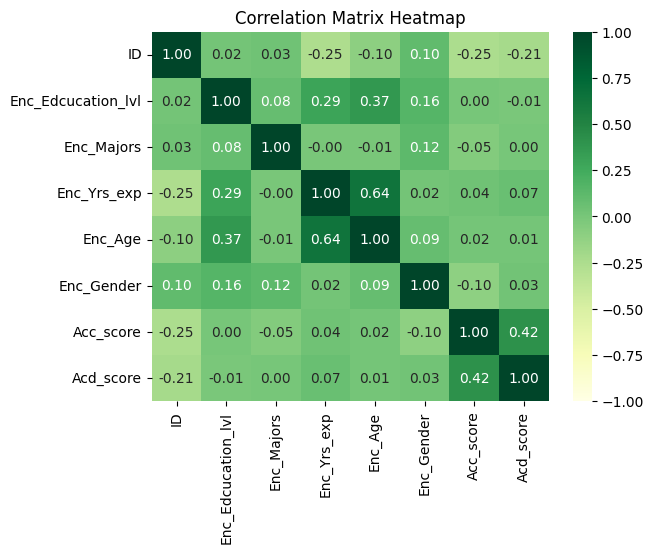

In [ ]:
# Generate correlation matrix
corr_matrix = df1.corr()

# Create heatmap
sns.heatmap(corr_matrix, cmap="YlGn", annot=True, fmt='.2f', vmin=-1, vmax=1, center=0)

# Set plot properties
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

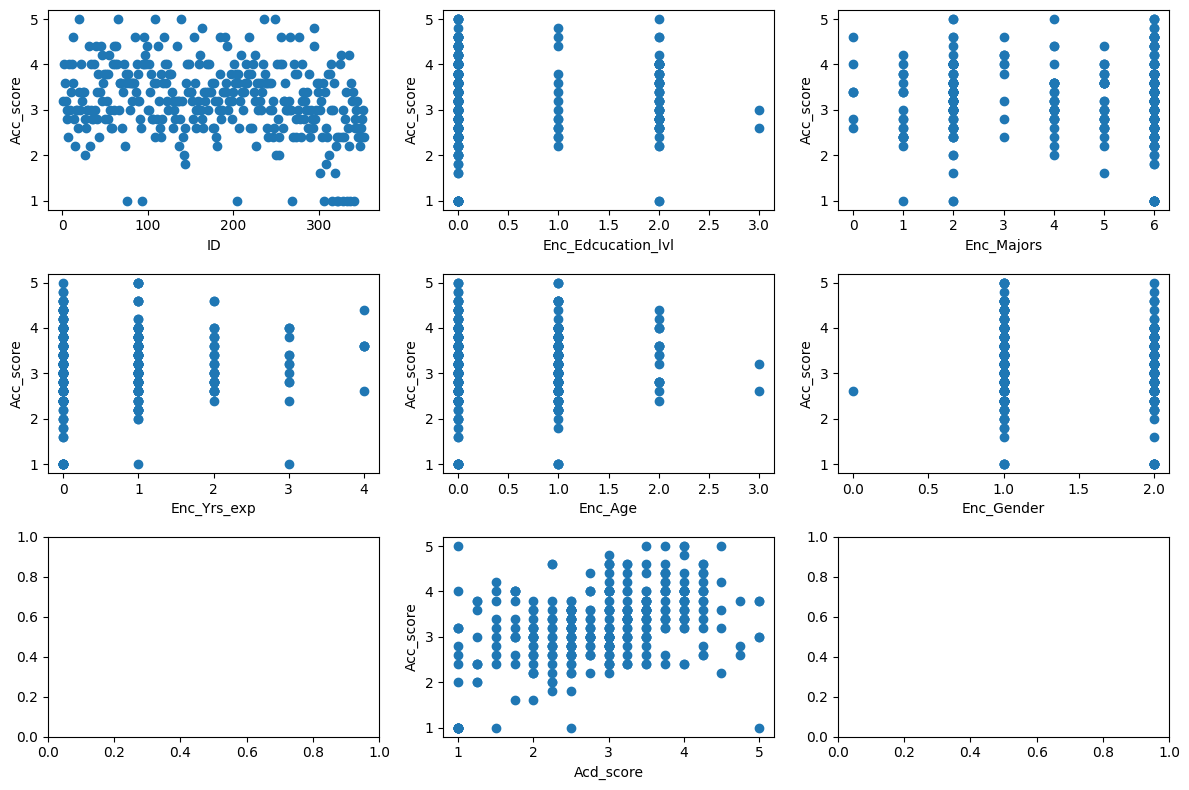

In [ ]:
# Set the target column
target_col = "Acc_score"

# Determine the number of rows and columns for the grid
num_cols = 3
num_rows = (len(df1.columns) - 1) // num_cols + 1

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Loop over each feature column and create a scatter plot in the corresponding subplot
for i, col in enumerate(df1.columns):
    if col != target_col:
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axes[row_idx, col_idx]
        ax.scatter(df1[col], df1[target_col])
        ax.set_xlabel(col)
        ax.set_ylabel(target_col)

# Adjust the spacing and layout of the subplots
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
#df2 -> One Hot Encoding
df2= pd.merge(demo2, s_acc_Score, on='ID')
df2 = pd.merge(df2, s_acd_score, on='ID')
df2['Scaled_Acd_score']=df2['Scaled_Acd_score']
df2['Scaled_Acc_score']=df2['Scaled_Acc_score']
df2

,ID,"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)","Doctorate (PhD, M.Phil)","Master's degree (MCA, MBA, M.Tech, MSc...)",Post Graduate Diploma,Business/Administration,Commerce/Accounting,Engineering,Mathematics/Statistics,Other,...,6 - 10 Years,Female,Male,Prefer not to say,18-25,26-35,36-45,45 and above,Scaled_Acc_score,Scaled_Acd_score
0,119,1,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0.92,0.6
1,174,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0.68,0.7
2,103,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0.68,0.7
3,168,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0.68,0.5
4,8,1,0,0,0,0,0,0,0,1,...,1,0,1,0,0,1,0,0,0.80,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,217,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0.76,0.3
349,70,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0.52,0.7
350,199,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0.56,0.95
351,151,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0.68,0.5


In [ ]:
df2.corr()

,ID,"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)","Doctorate (PhD, M.Phil)","Master's degree (MCA, MBA, M.Tech, MSc...)",Post Graduate Diploma,Business/Administration,Commerce/Accounting,Engineering,Mathematics/Statistics,Other,...,6 - 10 Years,Female,Male,Prefer not to say,18-25,26-35,36-45,45 and above,Scaled_Acc_score,Scaled_Acd_score
ID,1.000000,0.004020,0.024445,0.032344,-0.075240,0.047251,0.043231,-0.140722,0.052745,-0.122034,...,-0.179694,0.103971,-0.102726,-0.010461,0.123237,-0.119610,-0.027594,0.049631,-0.246752,-0.214931
"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)",0.004020,1.000000,-0.141736,-0.849691,-0.409133,-0.331252,-0.114835,0.215404,-0.075995,-0.022198,...,-0.196423,-0.172498,0.183132,-0.100080,0.361253,-0.277550,-0.145280,-0.141736,-0.003023,0.005347
"Doctorate (PhD, M.Phil)",0.024445,-0.141736,1.000000,-0.034159,-0.016448,0.107622,-0.012889,0.039296,-0.023421,-0.010737,...,-0.024644,0.014592,-0.090940,0.706102,-0.078318,0.088325,-0.018004,-0.005698,-0.041619,0.000029
"Master's degree (MCA, MBA, M.Tech, MSc...)",0.032344,-0.849691,-0.034159,1.000000,-0.098602,0.251152,0.104568,-0.189567,0.099419,-0.064365,...,0.133469,0.179660,-0.176855,-0.024120,-0.303470,0.208814,0.159435,0.166809,0.016867,-0.018222
Post Graduate Diploma,-0.075240,-0.409133,-0.016448,-0.098602,1.000000,0.168364,0.044878,-0.101514,-0.019492,0.164371,...,0.159664,0.014381,-0.013110,-0.011614,-0.144306,0.144663,0.008377,-0.016448,-0.009410,0.022228
Business/Administration,0.047251,-0.331252,0.107622,0.251152,0.168364,1.000000,-0.053911,-0.191591,-0.097966,-0.044909,...,0.097583,0.040938,-0.039073,-0.016829,-0.228851,0.169666,0.099581,0.107622,-0.018650,-0.088120
Commerce/Accounting,0.043231,-0.114835,-0.012889,0.104568,0.044878,-0.053911,1.000000,-0.103611,-0.052979,-0.024286,...,0.060007,0.033008,-0.031988,-0.009101,-0.040465,-0.007639,0.110599,-0.012889,0.109764,0.041712
Engineering,-0.140722,0.215404,0.039296,-0.189567,-0.101514,-0.191591,-0.103611,1.000000,-0.188280,-0.086310,...,-0.068202,-0.162440,0.152763,0.087837,0.111866,-0.065947,-0.088120,-0.045805,0.071171,0.018409
Mathematics/Statistics,0.052745,-0.075995,-0.023421,0.099419,-0.019492,-0.097966,-0.052979,-0.188280,1.000000,-0.044133,...,-0.033445,0.090565,-0.088677,-0.016538,0.018613,-0.001722,-0.074004,0.109930,0.001859,-0.022937
Other,-0.122034,-0.022198,-0.010737,-0.064365,0.164371,-0.044909,-0.024286,-0.086310,-0.044133,1.000000,...,0.091311,0.006801,-0.005973,-0.007581,-0.106908,0.125289,-0.033925,-0.010737,0.040323,0.052369


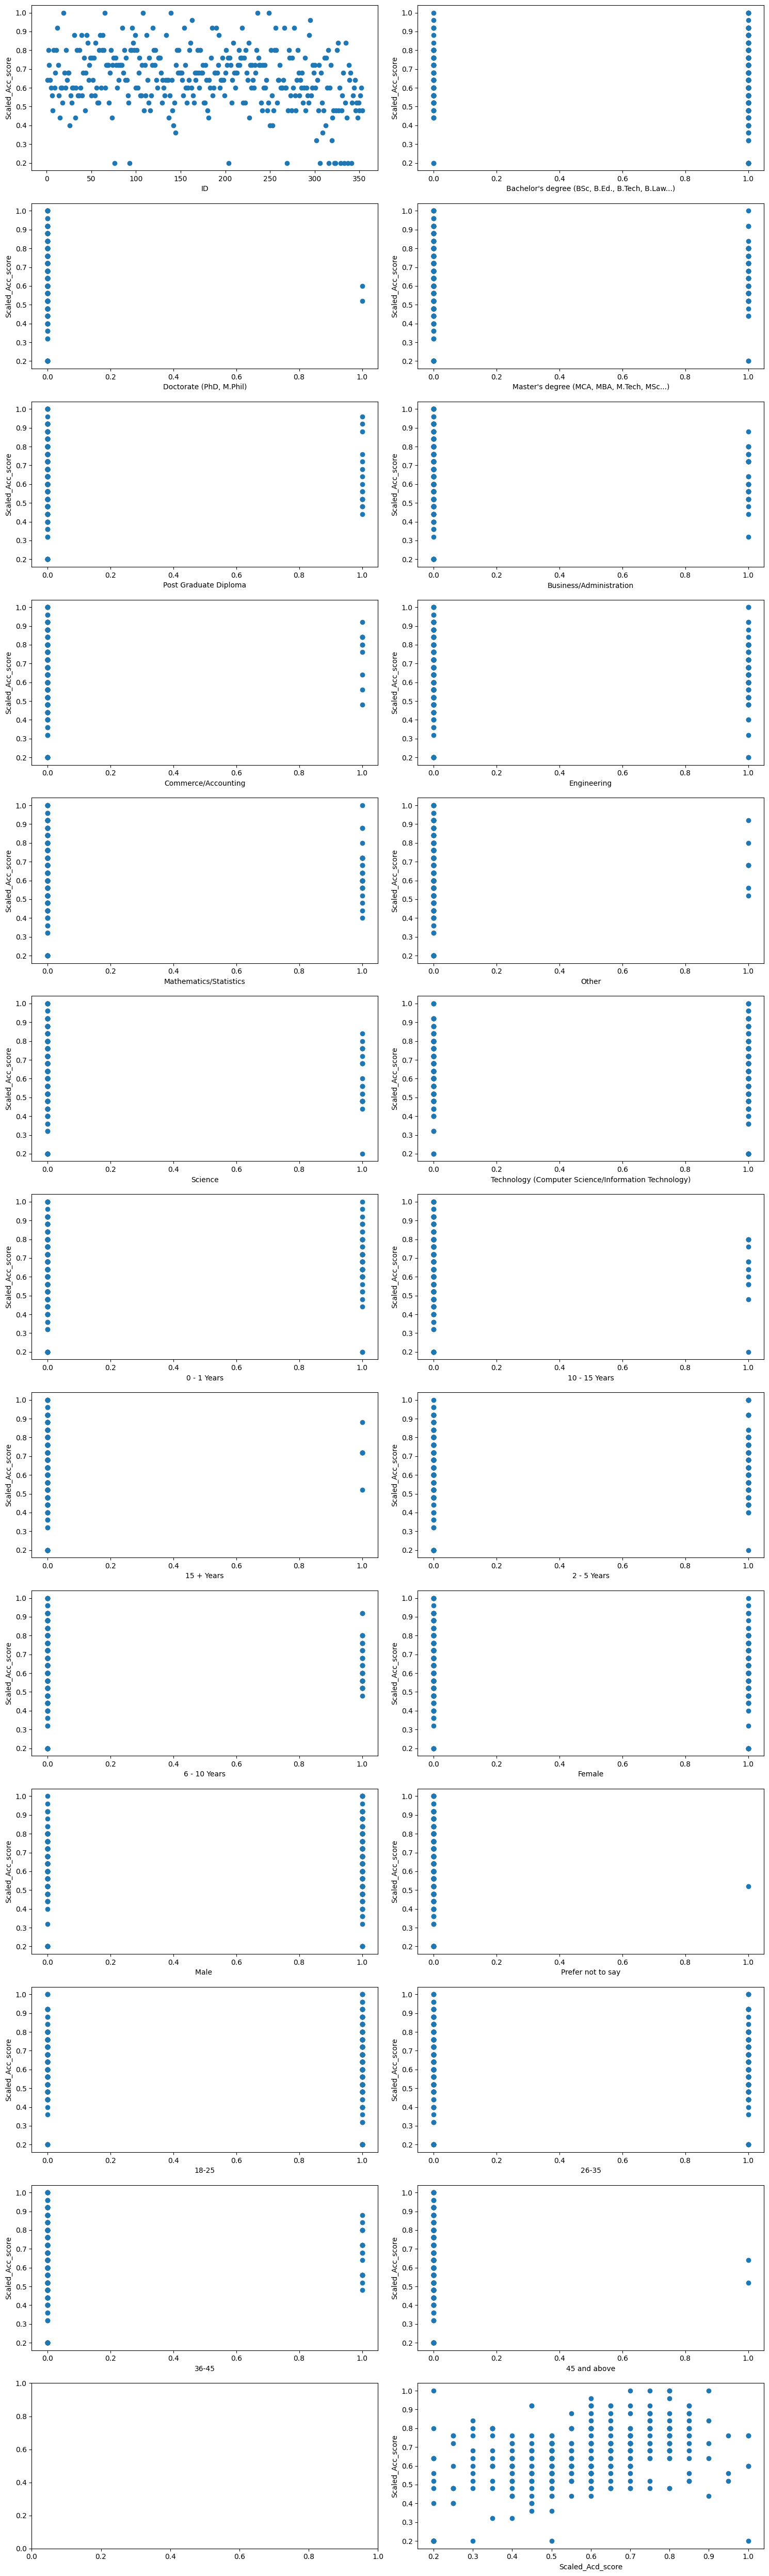

In [ ]:
# Set the target column
target_col = "Scaled_Acc_score"

# Determine the number of rows and columns for the grid
num_cols = 2
num_rows = (len(df2.columns) - 1) // num_cols + 1

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 50))

# Loop over each feature column and create a scatter plot in the corresponding subplot
for i, col in enumerate(df2.columns):
    if col != target_col:
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axes[row_idx, col_idx]
        ax.scatter(df2[col], df2[target_col])
        ax.set_xlabel(col)
        ax.set_ylabel(target_col)

# Adjust the spacing and layout of the subplots
plt.tight_layout()

# Display the plot
plt.show()

# ML on - Label Encoded Data 

## Train/Test Data 

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 352
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  353 non-null    int64  
 1   Enc_Edcucation_lvl  353 non-null    int64  
 2   Enc_Majors          353 non-null    int64  
 3   Enc_Yrs_exp         353 non-null    int64  
 4   Enc_Age             353 non-null    int64  
 5   Enc_Gender          353 non-null    int64  
 6   Acc_score           353 non-null    float64
 7   Acd_score           353 non-null    Float64
dtypes: Float64(1), float64(1), int64(6)
memory usage: 25.2 KB


In [ ]:
X=df1.drop(['ID','Acd_score'],axis=1)
y=df1['Acd_score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

## Decision Tree Regressor 

In [ ]:
y_test=y_test.astype('float64')

Best parameters: {'max_depth': 2, 'min_samples_leaf': 1}
Best mean squared error: 0.72685
Mean squared error: 0.79248
Mean absolute error: 0.70050
R-squared score: 0.11188


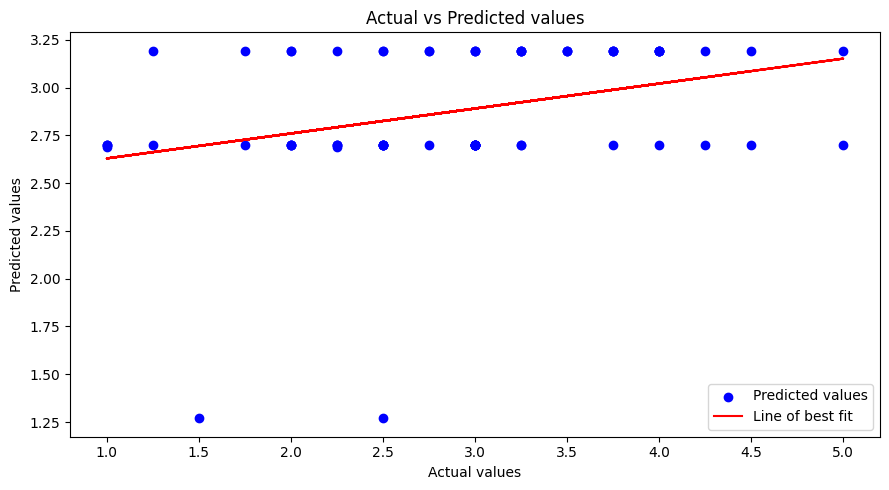

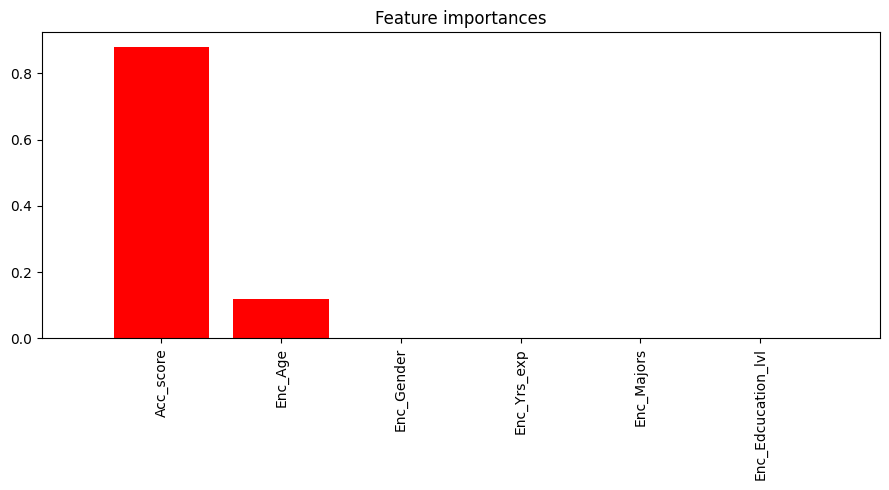

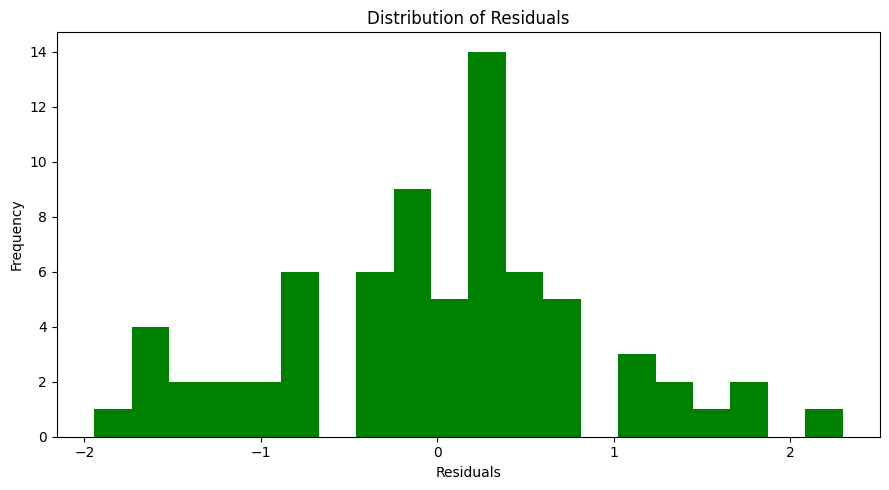

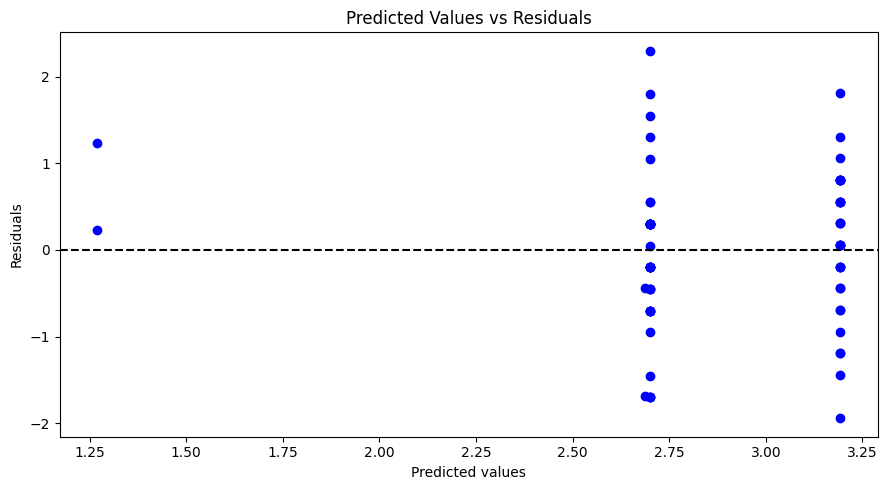

In [ ]:
param_grid = {
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))
y_pred = grid_search.predict(X_test)


# Calculate the evaluation metrics between the predicted and actual target values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))
print("Mean absolute error: {:.5f}".format(mae))
print("R-squared score: {:.5f}".format(r2))
print("==========================================================================================================================")


# Plot the predicted values against the actual values
plt.figure(figsize=(9,5))
plt.scatter(y_test, y_pred, color='b', label='Predicted values')
# Add a line of best fit
p = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(p, y_test), 'r-', label='Line of best fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.tight_layout()
plt.show()


print("==========================================================================================================================")
# Plot feature importance
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(9,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


print("==========================================================================================================================")
# Plot the distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(9,5))
plt.hist(residuals, bins=20, color='g')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()
print("==========================================================================================================================")
# Plot the predicted values against the residuals
plt.figure(figsize=(9,5))
plt.scatter(y_pred, residuals, color='b')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.tight_layout()
plt.show()
print("==========================================================================================================================")

## Support Vector Regressor

Best parameters: {'C': 1, 'gamma': 'scale'}
Best mean squared error: 0.72723
Mean squared error: 0.75220
Mean absolute error: 0.67073
R-squared score: 0.15702


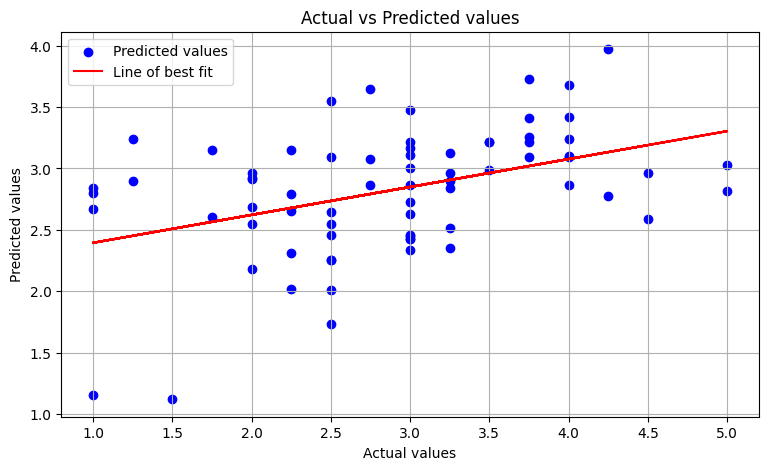

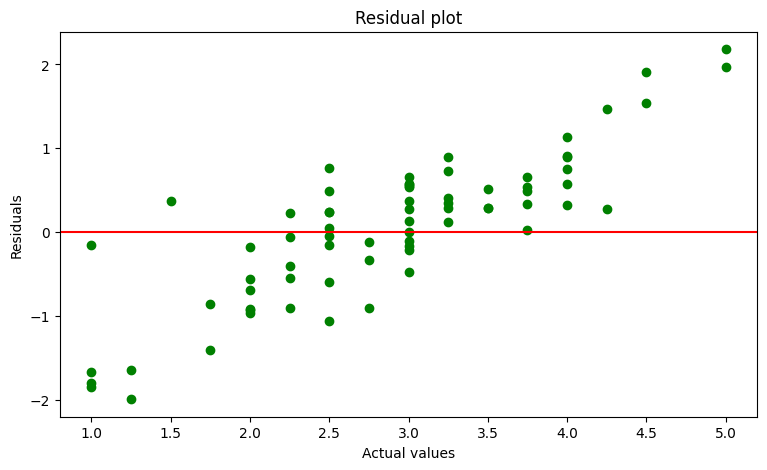

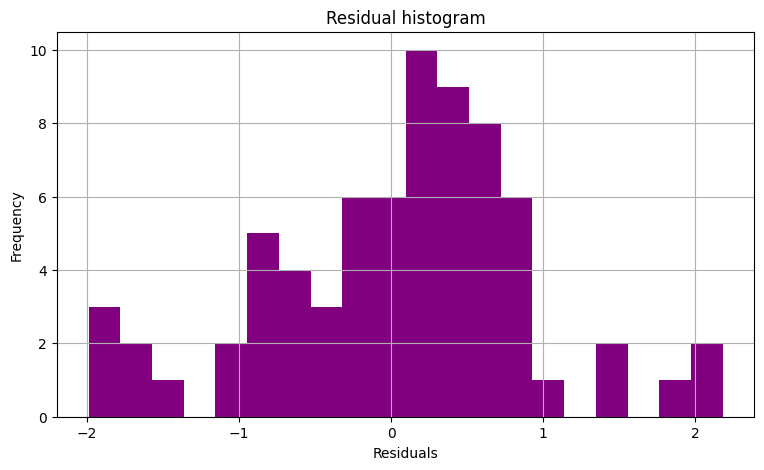

In [ ]:
param_grid = {
    'C': [0.01,0.1, 1, 10, 100],
    'gamma': [0.001,0.01, 0.1, 1, 'scale']
}
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))
y_pred = grid_search.predict(X_test)
y_test=y_test.astype('float64')
# Calculate the evaluation metrics between the predicted and actual target values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))
print("Mean absolute error: {:.5f}".format(mae))
print("R-squared score: {:.5f}".format(r2))
print("==========================================================================================================================")
# Plot the predicted values against the actual values
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(y_test, y_pred, c='blue', label='Predicted values')# Add a line of best fit
p = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(p, y_test), 'r-', label='Line of best fit')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
ax.set_title('Actual vs Predicted values')
ax.legend()
ax.grid(True)
plt.show()
print("==========================================================================================================================")
# Plot the residuals
fig, ax = plt.subplots(figsize=(9,5))
residuals = y_test - y_pred
ax.scatter(y_test, residuals, c='green')
ax.axhline(y=0, color='red')
ax.set_xlabel('Actual values')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
plt.show()
print("==========================================================================================================================")
# Plot a histogram of the residuals
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(residuals, bins=20, color='purple')
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Residual histogram')
ax.grid(True)
plt.show()
print("==========================================================================================================================")

## Random Forest Regressor

Best hyperparameters: {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 10}
Best negative mean squared error: 0.70724


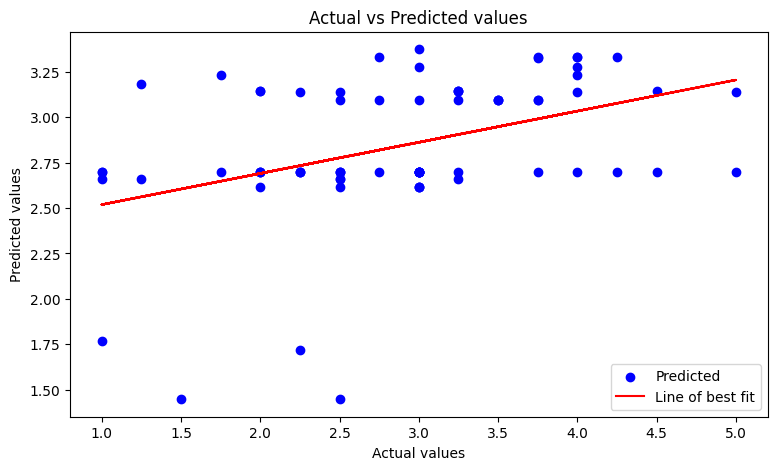

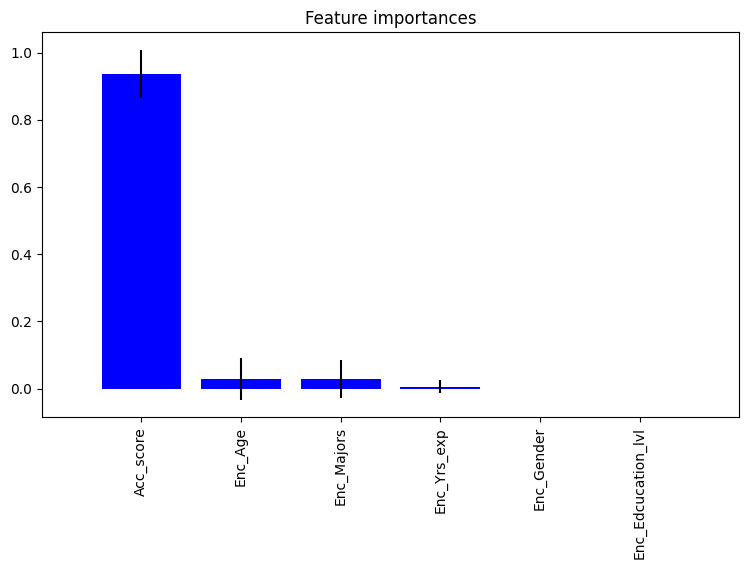

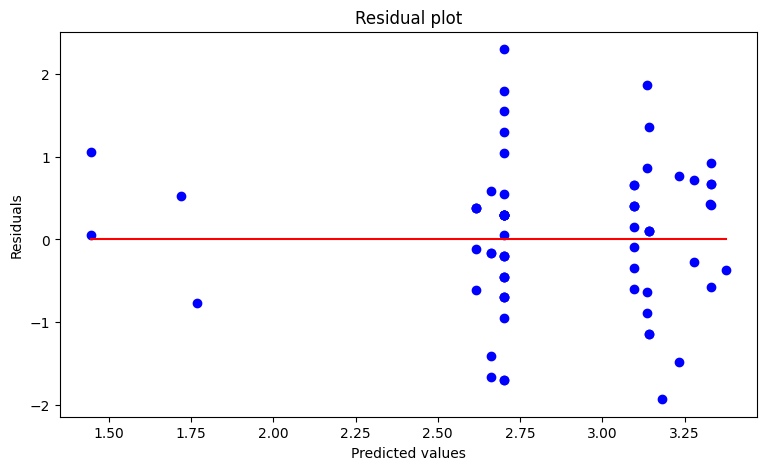

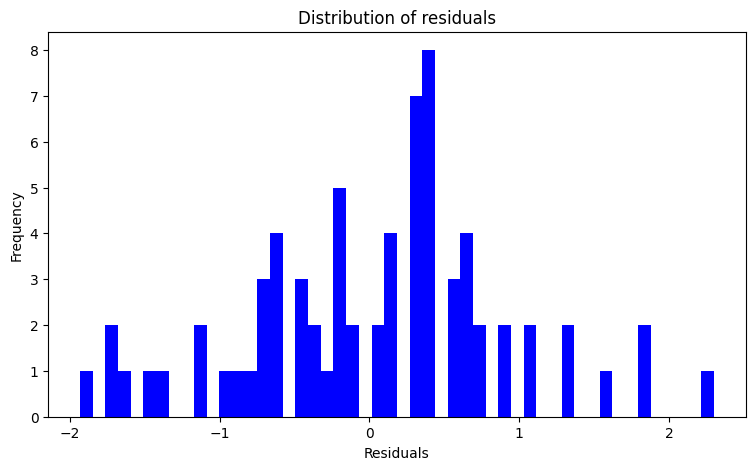

Mean squared error: 0.74583
Mean absolute error: 0.68365
R-squared score: 0.16415


In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200, 250],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}
rf_regressor = RandomForestRegressor()
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best hyperparameters: {}".format(grid_search.best_params_))
print("Best negative mean squared error: {:.5f}".format(-grid_search.best_score_))
y_predicted = grid_search.predict(X_test)
y_test=y_test.astype('float64')
# Calculate the evaluation metrics between the predicted and actual target values
mean_squared_error_value = mean_squared_error(y_test, y_predicted)
mean_absolute_error_value = mean_absolute_error(y_test, y_predicted)
r2_score_value = r2_score(y_test, y_predicted)
print("==========================================================================================================================")
# Plot the predicted values against the actual values
plt.figure(figsize=(9,5))
plt.scatter(y_test, y_predicted, color='b', label='Predicted')
# Add a line of best fit
p = np.polyfit(y_test, y_predicted, 1)
plt.plot(y_test, np.polyval(p, y_test), 'r-', label='Line of best fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()
print("==========================================================================================================================")
# Plot feature importance
importances = grid_search.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in grid_search.best_estimator_.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(9,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()
print("==========================================================================================================================")
# Plot residuals
residuals = y_test - y_predicted
plt.figure(figsize=(9,5))
plt.scatter(y_predicted, residuals, color='b')
plt.plot([min(y_predicted), max(y_predicted)], [0, 0], color='r')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()
print("==========================================================================================================================")
# Plot distribution of residuals
plt.figure(figsize=(9,5))
plt.hist(residuals, bins=50, color='b')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of residuals')
plt.show()
print("==========================================================================================================================")
print("Mean squared error: {:.5f}".format(mean_squared_error_value))
print("Mean absolute error: {:.5f}".format(mean_absolute_error_value))
print("R-squared score: {:.5f}".format(r2_score_value))


## Gradient Boosting Regressor

Best parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 50}
Best mean squared error: 0.79732
Mean squared error: 0.76135
Mean absolute error: 0.70183
R-squared score: 0.14677


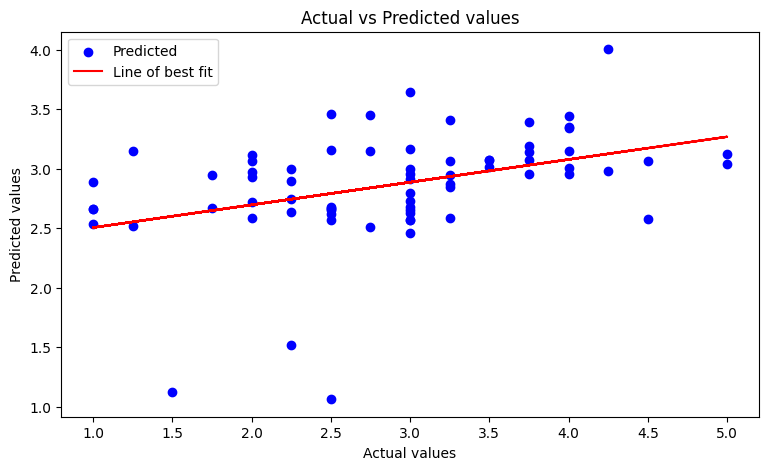

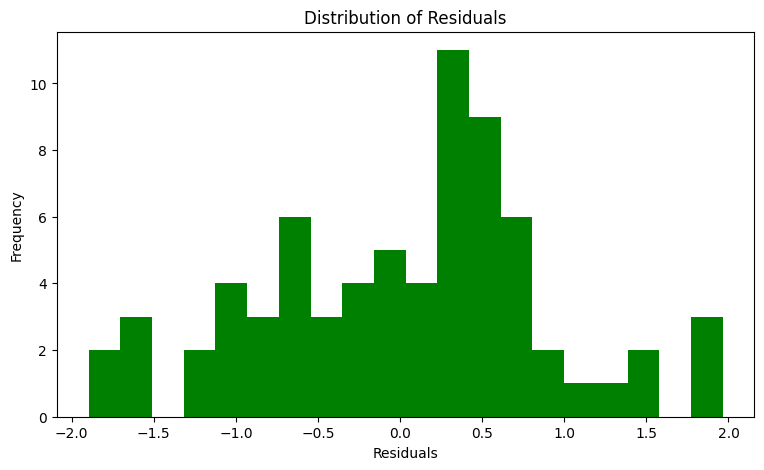

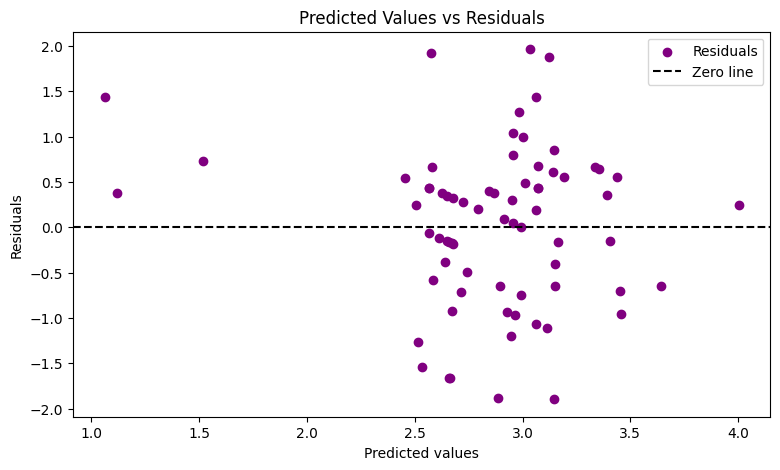

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}
gb_reg = GradientBoostingRegressor()
grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))
y_pred = grid_search.predict(X_test)
y_test=y_test.astype('float64')
# Calculate the evaluation metrics between the predicted and actual target values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))
print("Mean absolute error: {:.5f}".format(mae))
print("R-squared score: {:.5f}".format(r2))
print("==========================================================================================================================")
# Plot the predicted values against the actual values
plt.figure(figsize=(9,5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
# Add a line of best fit
p = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(p, y_test), 'r-', label='Line of best fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()
print("==========================================================================================================================")
# Plot the distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(9,5))
plt.hist(residuals, bins=20, color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()
print("==========================================================================================================================")
# Plot the predicted values against the residuals
plt.figure(figsize=(9,5))
plt.scatter(y_pred, residuals, color='purple', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', label='Zero line')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.legend()
plt.show()
print("==========================================================================================================================")

In [ ]:
# define the data dictionary
data = {'Model name': ['Decision Tree Regressor', 'Support Vector Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor'],
        'R-squared score': [0.12350, 0.06149, 0.09725, 0.08560]}

# create a Pandas DataFrame from the dictionary
df = pd.DataFrame(data)

# highlight good R-squared scores with light blue color
def highlight_good_scores(val):
    color = 'lightblue' if val >= 0.1 else ''
    return f'background-color: {color}'

# apply the highlight function to the DataFrame
styled_df = df.style.applymap(highlight_good_scores, subset=['R-squared score'])

# set the border property
styled_df = styled_df.set_properties(**{'border': '1px solid black'})

# display the styled DataFrame
display(styled_df)

,Model name,R-squared score
0,Decision Tree Regressor,0.123500
1,Support Vector Regressor,0.061490
2,Random Forest Regressor,0.097250
3,Gradient Boosting Regressor,0.085600


# ML on - One Hot Encoded Data 

## Train/Test Data  

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 352
Data columns (total 26 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   ID                                                    353 non-null    int64  
 1   Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)      353 non-null    int64  
 2   Doctorate (PhD, M.Phil)                               353 non-null    int64  
 3   Master's degree (MCA, MBA, M.Tech, MSc...)            353 non-null    int64  
 4   Post Graduate Diploma                                 353 non-null    int64  
 5   Business/Administration                               353 non-null    int64  
 6   Commerce/Accounting                                   353 non-null    int64  
 7   Engineering                                           353 non-null    int64  
 8   Mathematics/Statistics                                353 no

In [ ]:
X=df2.drop(['ID','Scaled_Acd_score'],axis=1)
y=df2['Scaled_Acd_score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

## Decision Tree Regressor 

Best parameters: {'max_depth': 2, 'min_samples_leaf': 5}
Best mean squared error: 0.02917
Mean squared error: 0.03093
Mean absolute error: 0.13837
R-squared score: 0.13351


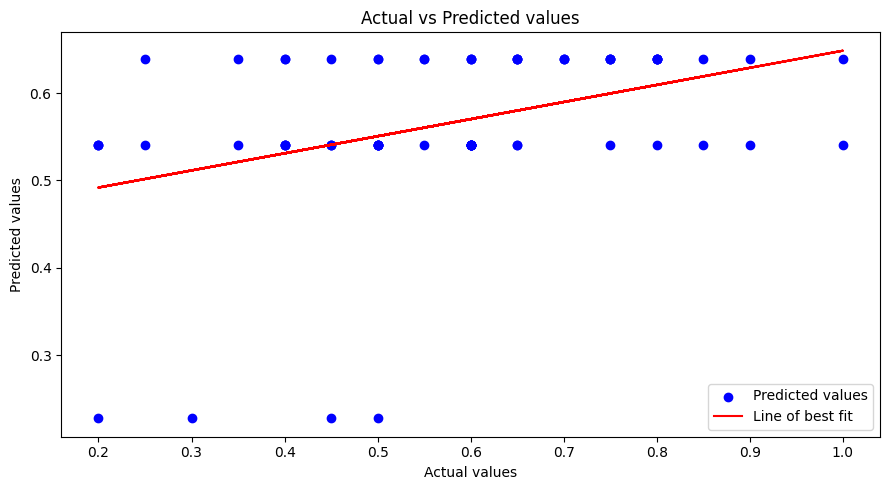

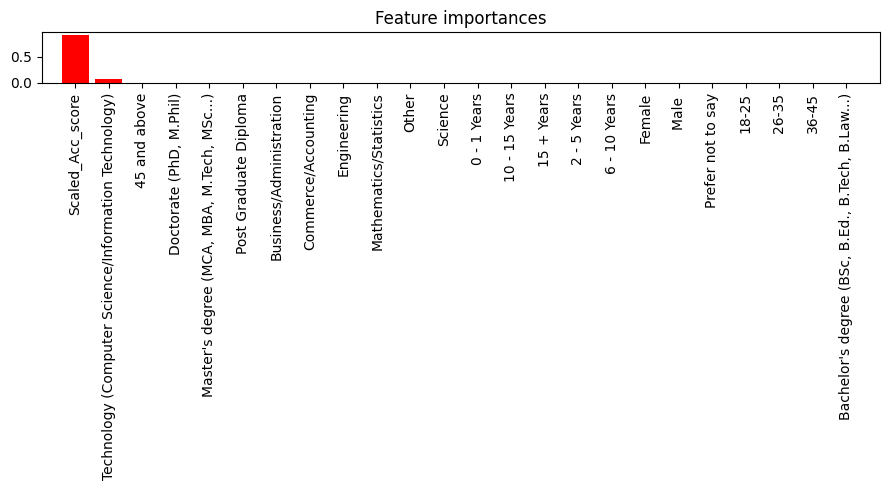

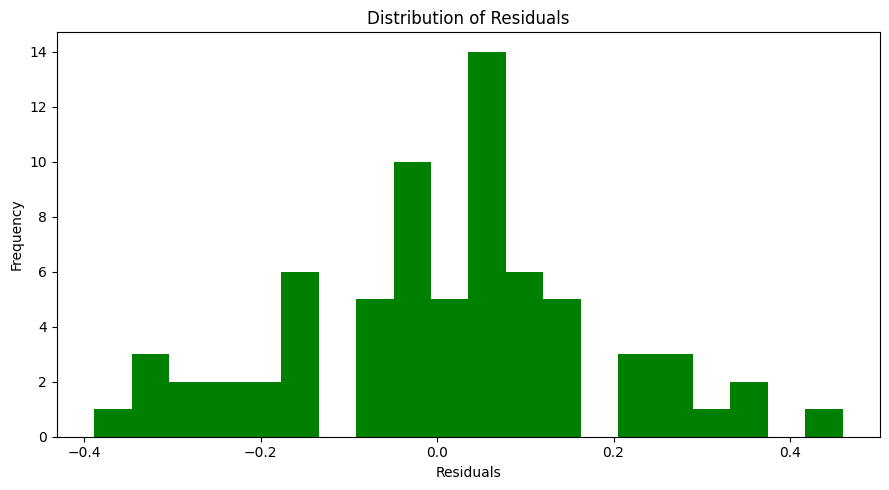

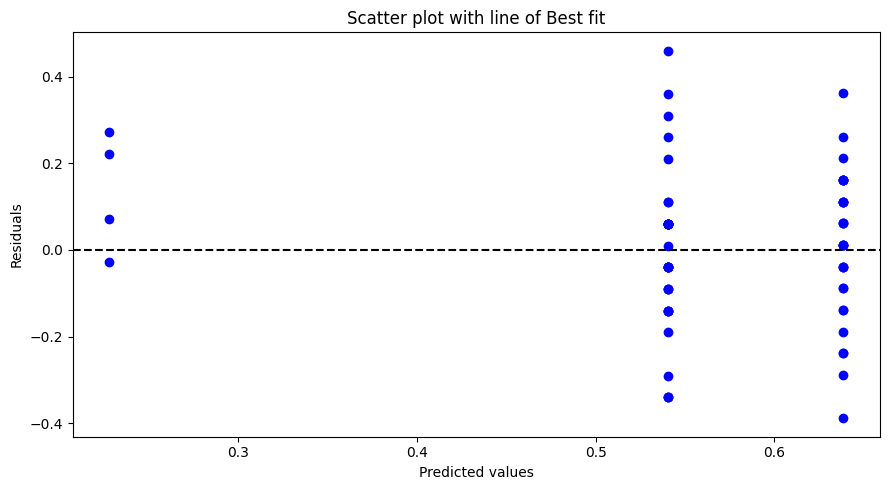

In [ ]:
param_grid = {
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))
y_pred = grid_search.predict(X_test)
y_test=y_test.astype("float64")

# Calculate the evaluation metrics between the predicted and actual target values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))
print("Mean absolute error: {:.5f}".format(mae))
print("R-squared score: {:.5f}".format(r2))
print("==========================================================================================================================")


# Plot the predicted values against the actual values
plt.figure(figsize=(9,5))
plt.scatter(y_test, y_pred, color='b', label='Predicted values')
# Add a line of best fit
p = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(p, y_test), 'r-', label='Line of best fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.tight_layout()
plt.show()


print("==========================================================================================================================")
# Plot feature importance
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(9,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


print("==========================================================================================================================")
# Plot the distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(9,5))
plt.hist(residuals, bins=20, color='g')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()
print("==========================================================================================================================")
# Plot the predicted values against the residuals
plt.figure(figsize=(9,5))
plt.scatter(y_pred, residuals, color='b')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Scatter plot with line of Best fit')
plt.axhline(y=0, color='k', linestyle='--')
plt.tight_layout()
plt.show()
print("==========================================================================================================================")

## Random Forest Regressor

In [ ]:
# Define the parameter grid for the Random Forest Regressor, starting with the best parameters from the Decision Tree Regressor Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Create a Random Forest Regressor
rf = RandomForestRegressor()

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean squared error
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))

# Use the best hyperparameters to fit the Random Forest Regressor on the training data
rf_best = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'],
                                 max_depth=grid_search.best_params_['max_depth'],
                                 min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                 max_features=grid_search.best_params_['max_features'],
                                 min_samples_split=grid_search.best_params_['min_samples_split'],
                                 bootstrap=grid_search.best_params_['bootstrap'])
rf_best.fit(X_train, y_train)

# Predict the response variable on the test data
y_pred = rf_best.predict(X_test)

# Evaluate the performance of the Random Forest Regressor
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: {:.5f}".format(mse))
print("Mean absolute error: {:.5f}".format(mae))
print("R-squared score: {:.5f}".format(r2))


Best parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}
Best mean squared error: 0.02849
Mean squared error: 0.02956
Mean absolute error: 0.13503
R-squared score: 0.17187


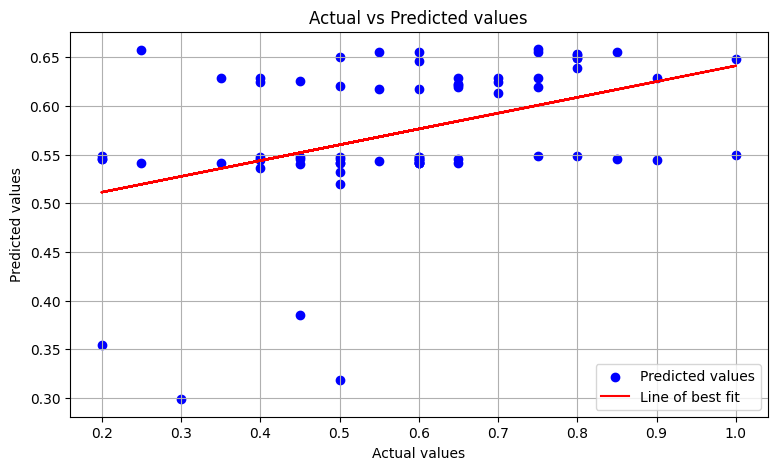

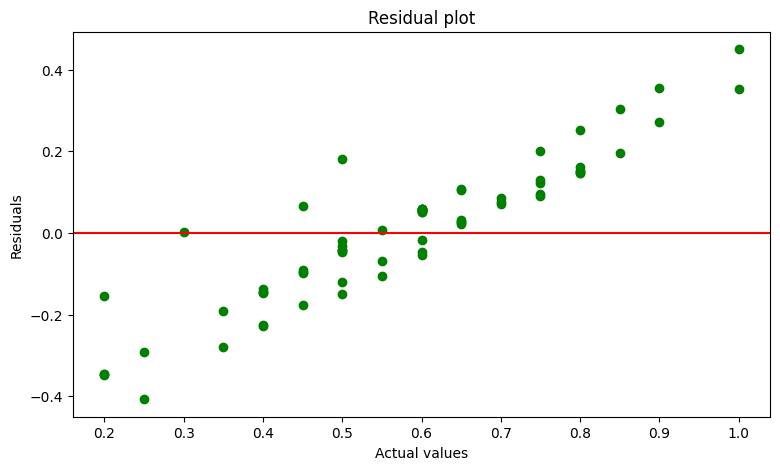

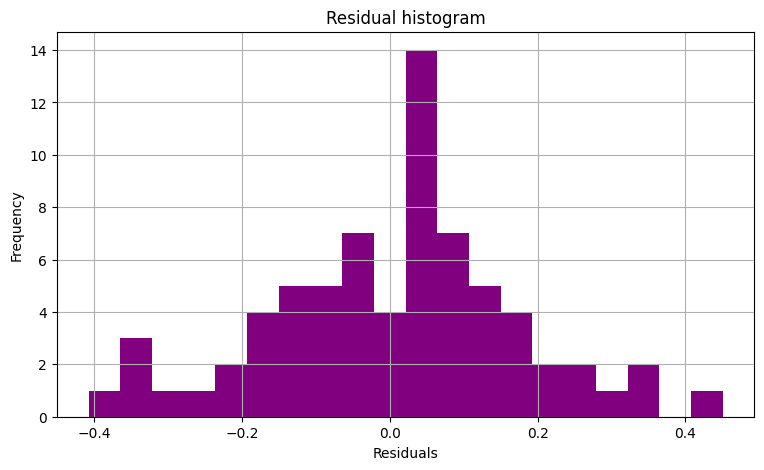

In [ ]:
print("==========================================================================================================================")
# Plot the predicted values against the actual values
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(y_test, y_pred, c='b', label='Predicted values')
# Add a line of best fit
p = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(p, y_test), 'r-', label='Line of best fit')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
ax.set_title('Actual vs Predicted values')
ax.legend()
ax.grid(True)
plt.show()
print("==========================================================================================================================")
# Plot the residuals
fig, ax = plt.subplots(figsize=(9,5))
residuals = y_test - y_pred
ax.scatter(y_test, residuals, c='green')
ax.axhline(y=0, color='red')
ax.set_xlabel('Actual values')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
plt.show()
print("==========================================================================================================================")
# Plot a histogram of the residuals
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(residuals, bins=20, color='purple')
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Residual histogram')
ax.grid(True)
plt.show()
print("==========================================================================================================================")

## Support Vector Regressor

Best parameters: {'C': 100, 'gamma': 0.001}
Best mean squared error: 0.03149
Mean squared error: 0.03006
Mean absolute error: 0.13378
R-squared score: 0.15789


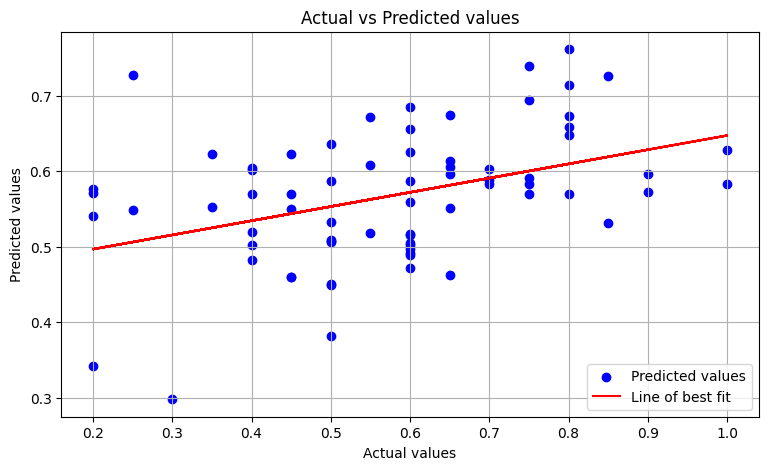

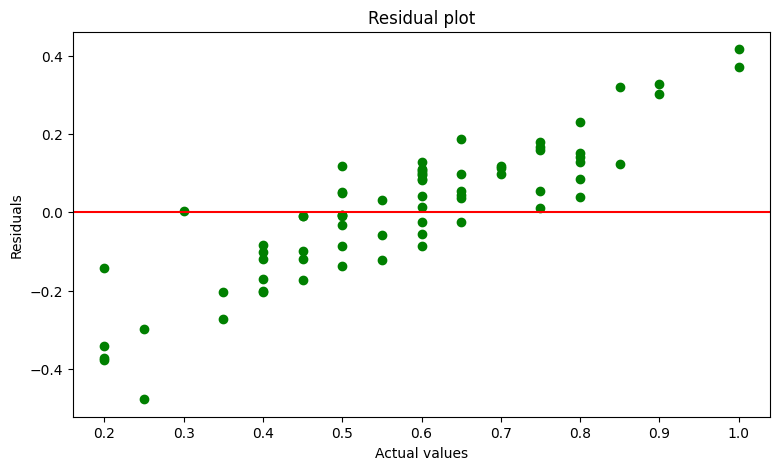

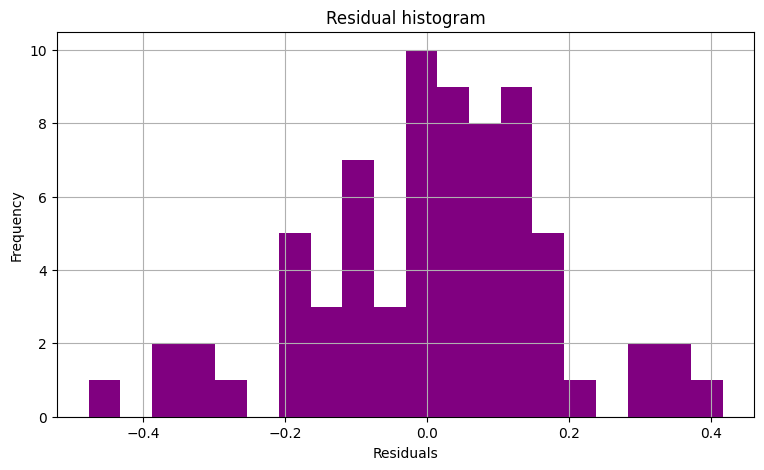

In [ ]:
param_grid = {
    'C': [0.01,0.1, 1, 10, 100],
    'gamma': [0.001,0.01, 0.1, 1, 'scale']
}
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))
y_pred = grid_search.predict(X_test)
y_test=y_test.astype('float64')
# Calculate the evaluation metrics between the predicted and actual target values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))
print("Mean absolute error: {:.5f}".format(mae))
print("R-squared score: {:.5f}".format(r2))
print("==========================================================================================================================")
# Plot the predicted values against the actual values
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(y_test, y_pred, c='b', label='Predicted values')
# Add a line of best fit
p = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(p, y_test), 'r-', label='Line of best fit')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
ax.set_title('Actual vs Predicted values')
ax.legend()
ax.grid(True)
plt.show()
print("==========================================================================================================================")
# Plot the residuals
fig, ax = plt.subplots(figsize=(9,5))
residuals = y_test - y_pred
ax.scatter(y_test, residuals, c='green')
ax.axhline(y=0, color='red')
ax.set_xlabel('Actual values')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
plt.show()
print("==========================================================================================================================")
# Plot a histogram of the residuals
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(residuals, bins=20, color='purple')
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Residual histogram')
ax.grid(True)
plt.show()
print("==========================================================================================================================")

## Gradient Boosting Regressor

Best parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 50}
Best mean squared error: 0.03248
Mean squared error: 0.03109
Mean absolute error: 0.14235
R-squared score: 0.12895


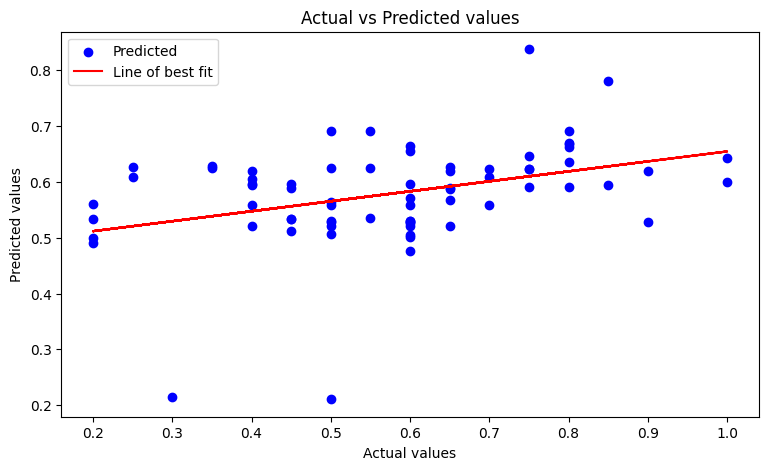

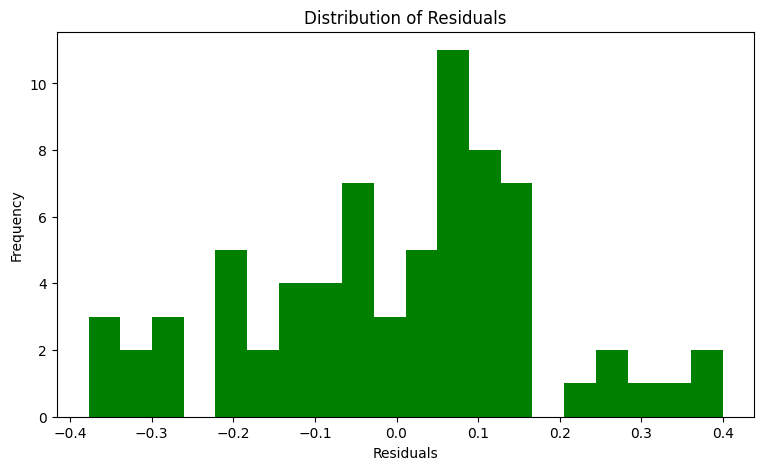

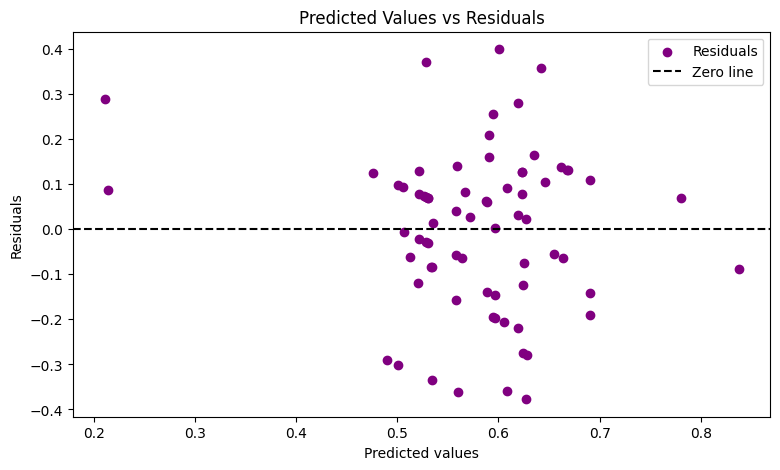

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}
gb_reg = GradientBoostingRegressor()
grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))
y_pred = grid_search.predict(X_test)
y_test=y_test.astype('float64')
# Calculate the evaluation metrics between the predicted and actual target values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))
print("Mean absolute error: {:.5f}".format(mae))
print("R-squared score: {:.5f}".format(r2))
print("==========================================================================================================================")
# Plot the predicted values against the actual values
plt.figure(figsize=(9,5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
# Add a line of best fit
p = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(p, y_test), 'r-', label='Line of best fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()
print("==========================================================================================================================")
# Plot the distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(9,5))
plt.hist(residuals, bins=20, color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()
print("==========================================================================================================================")
# Plot the predicted values against the residuals
plt.figure(figsize=(9,5))
plt.scatter(y_pred, residuals, color='purple', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', label='Zero line')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.legend()
plt.show()
print("==========================================================================================================================")